In [1]:
import pandas as pd

from lifelines import KaplanMeierFitter, NelsonAalenFitter
from lifelines.utils import median_survival_times, qth_survival_time

In [2]:
ALPHA=0.05

Read the data

In [3]:
DatOriginal = pd.read_csv("DatasetsMedicalResearch/Time to discontinuation of the use of an IUD.dat", sep="\s+")

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_3639/1545641242.py:1: SyntaxWarning: invalid escape sequence '\s'
  DatOriginal = pd.read_csv("DatasetsMedicalResearch/Time to discontinuation of the use of an IUD.dat", sep="\s+")


Kaplan-Meier estimator

In [4]:
kmf = KaplanMeierFitter(alpha=ALPHA)
kmf.fit(DatOriginal['time'], event_observed=DatOriginal['status'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 18 total observations, 9 right-censored observations>

<Axes: xlabel='timeline'>

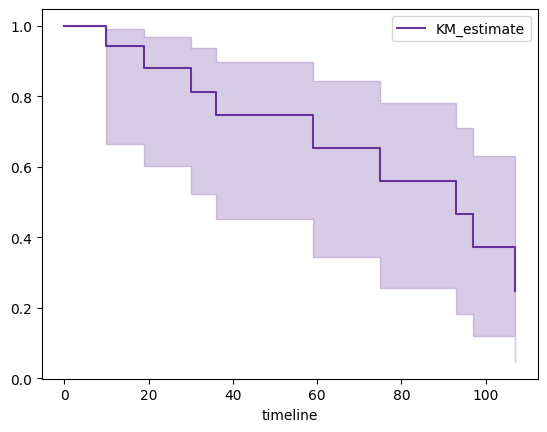

In [5]:
kmf.plot_survival_function(color='rebeccapurple')

Nelson-Aalen estimator

In [6]:
naf = NelsonAalenFitter(alpha=ALPHA)
naf.fit(DatOriginal['time'], event_observed=DatOriginal['status'])

<lifelines.NelsonAalenFitter:"NA_estimate", fitted with 18 total observations, 9 right-censored observations>

<Axes: xlabel='timeline'>

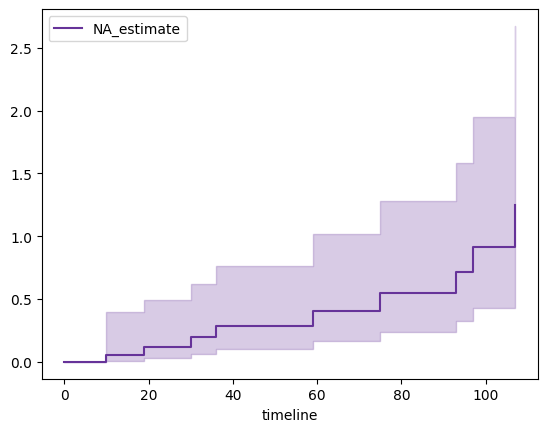

In [7]:
naf.plot_cumulative_hazard(color='rebeccapurple')

<Axes: >

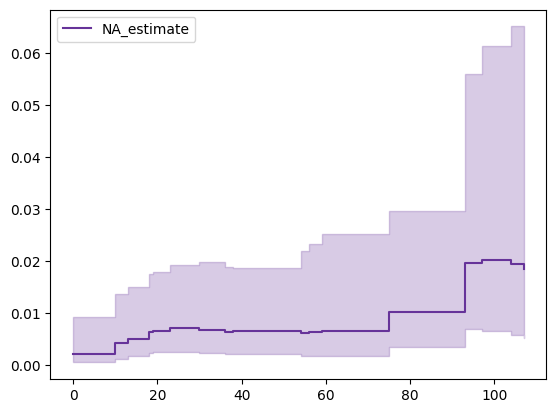

In [8]:
bandwidth=25
naf.plot_hazard(bandwidth, color='rebeccapurple')

Median estimator

In [9]:
kmf.median_survival_time_

93.0

In [10]:
median_survival_times(kmf.confidence_interval_)

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.5,36.0,inf


In [11]:
qth_survival_time(0.5, kmf)

/home/dmitri/.local/lib/python3.12/site-packages/lifelines/fitters/__init__.py:279: ApproximationWarning: Approximating using `survival_function_`. To increase accuracy, try using or increasing the resolution of the timeline kwarg in `.fit(..., timeline=timeline)`.

  warnings.warn(


93.0